# Matplotlib Homework

In [1]:
# Import all necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# load necessary files
mouse_drug_df = 'mouse_drug_data.csv'
clinical_trial_df = 'clinicaltrial_data.csv'

# Read the files
mouse_data = pd.read_csv(mouse_drug_df)
clinical_data = pd.read_csv(clinical_trial_df)


In [2]:
# display mouse data
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# display clinical data
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combined both tables

merge_table_data = pd.merge(clinical_data, mouse_data, on="Mouse ID", how="outer")
merge_table_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
merge_table_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

In [41]:
# Calculate mean of Tumor Volume(mm3) 
# grouped data by Drug and Timepoint ( will be used multiple times)
grouped_data_dt = merge_table_data.groupby(['Drug','Timepoint'])
tumor_mean_data = grouped_data_dt['Tumor Volume (mm3)'].mean()

#convert it to Dataframe
tumor_mean_pd = pd.DataFrame(tumor_mean_data)

#Preview Dataframe
tumor_mean_pd

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [42]:
# Calculate standard error of Tumor Volume(mm3) grouped by Drug and Timepoint
# Use same grouped data, as it is already grouped by Drug and Timepoint

tumor_sem_data = grouped_data_dt['Tumor Volume (mm3)'].sem()

#convert it to Dataframe
tumor_sem_pd = pd.DataFrame(tumor_sem_data)

#Preview Dataframe
tumor_sem_pd

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [43]:
# Minor Data Munging to Re-Format the Data Frames(Tumor column mean)
reformated_tumor_mean = tumor_mean_pd.pivot_table(index = 'Timepoint',columns = 'Drug',values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
reformated_tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [44]:
# Minor Data Munging to Re-Format the Data Frames(Tumor column sem)
reformated_tumor_sem = tumor_sem_pd.pivot_table(index = 'Timepoint',columns = 'Drug',values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked
reformated_tumor_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


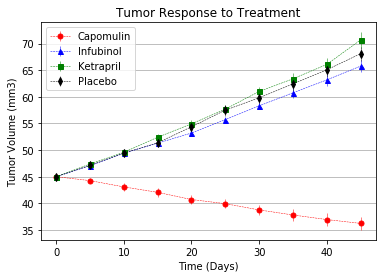

In [71]:
# Generate the Plot (with Error Bars)

# line graph with error bars
# Drug label for legend
plt.errorbar(reformated_tumor_mean.index, reformated_tumor_mean['Capomulin'], yerr=reformated_tumor_sem['Capomulin'], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Capomulin')

plt.errorbar(reformated_tumor_mean.index, reformated_tumor_mean['Infubinol'], yerr=reformated_tumor_sem['Infubinol'],
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label = 'Infubinol')

plt.errorbar(reformated_tumor_mean.index, reformated_tumor_mean['Ketapril'], yerr=reformated_tumor_sem['Ketapril'],
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = 'Ketrapril')

plt.errorbar(reformated_tumor_mean.index, reformated_tumor_mean['Placebo'], yerr=reformated_tumor_sem['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = 'Placebo')

# X axis limit
x_lim = len(reformated_tumor_mean.index)

# Graph title
plt.title("Tumor Response to Treatment")

# Label of X axis
plt.xlabel("Time (Days)")

# Label of Y axis
plt.ylabel("Tumor Volume (mm3)")

# legend, placed on top left corner 
plt.legend(loc='upper left')

#plt.hlines
plt.grid(which='major', axis='y', linestyle='-')

#show the figure
plt.show()



In [ ]:
# Save the figure as png file
#plt.savefig("../Images/Tumor_Response_to_Treatment.png")




In [45]:
# Perform same Mean & SE calculations, as on Tumor column, on Metastatic Sites column

# Calculate mean Met. Site data
# Use same grouped data, already grouped by Drug and Timepoint

metastatic_mean_data = grouped_data_dt['Metastatic Sites'].mean()

#convert it to Dataframe
metastatic_mean_pd = pd.DataFrame(metastatic_mean_data)

#Preview Dataframe
metastatic_mean_pd

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [46]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Use grouped data, already grouped by Drug and Timepoint

metastatic_sem_data = grouped_data_dt['Metastatic Sites'].sem()


# Convert to DataFrame
metastatic_sem_pd = pd.DataFrame(metastatic_sem_data)

# Preview DataFrame
metastatic_sem_pd

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [38]:
# Minor Data Munging to Re-Format the Data Frames(Met. Sites column mean)
reformated_metastatic_mean = metastatic_mean_pd.pivot_table(index = 'Timepoint',columns = 'Drug',values = 'Metastatic Sites')

# Preview that Reformatting worked
reformated_metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [39]:
# Minor Data Munging to Re-Format the Data Frames(Met. Sites column standard error)
reformated_metastatic_sem = metastatic_sem_pd.pivot_table(index = 'Timepoint',columns = 'Drug',values = 'Metastatic Sites')

# Preview that Reformatting worked
reformated_metastatic_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


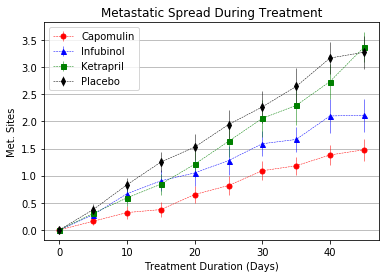

In [72]:
# Generate the 2nd Plot (with Error Bars)

# line graph with error bars
# Drug label for legend
plt.errorbar(reformated_metastatic_mean.index, reformated_metastatic_mean['Capomulin'], yerr=reformated_metastatic_sem['Capomulin'], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Capomulin')

plt.errorbar(reformated_metastatic_mean.index, reformated_metastatic_mean['Infubinol'], yerr=reformated_metastatic_sem['Infubinol'],
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label = 'Infubinol')

plt.errorbar(reformated_metastatic_mean.index, reformated_metastatic_mean['Ketapril'], yerr=reformated_metastatic_sem['Ketapril'],
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = 'Ketrapril')

plt.errorbar(reformated_metastatic_mean.index, reformated_metastatic_mean['Placebo'], yerr=reformated_metastatic_sem['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = 'Placebo')

# X axis limit
x_lim = len(reformated_metastatic_mean.index)

# Graph title
plt.title("Metastatic Spread During Treatment")

# Label of X axis
plt.xlabel("Treatment Duration (Days)")

# Label of Y axis
plt.ylabel("Met. Sites")

# legend, placed on top left corner 
plt.legend(loc='upper left')

#plt.hlines
plt.grid(which='major', axis='y', linestyle='-')

#show the figure
plt.show()

In [61]:
# Survival Rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = grouped_data_dt['Mouse ID'].count()

# Convert to Data Frame
mice_count_df = pd.DataFrame(mice_count)

# Rename Mouse ID as 'Mouse Count', as it is count of the Mouse ID column
renamed_mice_df = mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
renamed_mice_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
...                          ...
Ramicane  0                   25
          5                   25
          10                  24
          15                  24
          20                  23
          25                  23
          30                  23
          35                  21
          40                  20
          45                  20
Stelasyn  0                   26
          5                   25
          10                  23
          15                  23
          20                  21
          25                  19
          30                  18
          35                  16
          40                  12
          45                  11
Zoniferol 0                   25
          5                   24
          10                  22
          15                  21
          20                  17
          25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [63]:
# Minor Data Munging to Re-Format the Data Frames
reformated_mouse_count = renamed_mice_df.pivot_table(index = 'Timepoint',columns = 'Drug',values = 'Mouse Count')

# Preview the Data Frame
reformated_mouse_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


SyntaxError: invalid syntax (<ipython-input-70-f159f234f4e3>, line 2)

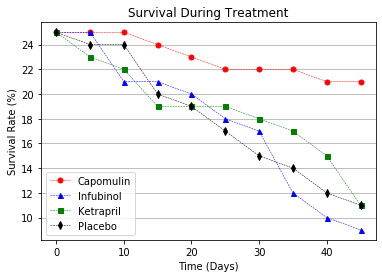

In [73]:
# Drug label for legend
plt.errorbar(reformated_mouse_count.index, reformated_mouse_count['Capomulin'], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Capomulin')

plt.errorbar(reformated_mouse_count.index, reformated_mouse_count['Infubinol'],
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label = 'Infubinol')

plt.errorbar(reformated_mouse_count.index, reformated_mouse_count['Ketapril'],
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = 'Ketrapril')

plt.errorbar(reformated_mouse_count.index, reformated_mouse_count['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = 'Placebo')

# X axis limit
x_lim = len(reformated_mouse_count.index)
y_lim = ()

# Graph title
plt.title("Survival During Treatment")

# Label of X axis
plt.xlabel("Time (Days)")

# Label of Y axis
plt.ylabel("Survival Rate (%)")

# legend, placed on top left corner 
plt.legend(loc='lower left')

#plt.hlines
plt.grid(which='major', axis='y', linestyle='-')

#show the figure
plt.show()